# __CMSE  201 - Fall 2019__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image001.png"
     alt="CMSE Grapical Image"
     style="float: right; margin-right: 10px;" 
     height="164" 
     width="164" />

# Homework 3:  Loading data in NumPy to explore weather patterns and working with ODEINT for Population and Resonance Modeling

## Goals

### By the end of this homework assignment, you would have practiced:
* Loading data in Numpy and visualizing it using Matplotlib
* Using ODEINT to solve ordinary differential equations for multiple systems

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, October 11th.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #3.  Submission instructions can be found at the end of the notebook.

## Grading

* Part 1: Loading and analyzing weather data in NumPy (8 points)
    - Question 1 (1 point)
    - Question 2 (2 points)
    - Question 3 (2 points)
    - Question 4 (2 points)
    - Question 5 (1 point)
* Part 2: Population dynamics (11 points)
    - Question 6 (4 points)
    - Question 7 (3 points)
    - Question 8 (4 points)
* Part 3: Forced oscillation and resonance (8 points)    
    - Question 9 (4 points)
    - Question 10 (3 points)
    - Question 11 (1 point)


Total points possible: **27**
___

## Part 1: Loading and analyzing weather data in NumPy (7 points)

In this section, we're going to review how NumPy can be used to read and write data. We will consider how to analyze the data by making plots that visualize the information contained in the data.

**Question 1**: Make sure you set up your notebook to produce matplotlib plots and import the right modules, as well NumPy. Include all important import commands and special matplotlib jupyter notebook commands here.

In [2]:
# Put your code here
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Question 2**: The first thing you're going to do is make sure you can load in the data using NumPy. There is a file on D2L called "weather.csv". Make sure that you download the file and move it to the same location on your computer as this Jupyter Notebook. The extension of this file (.csv) stands for "comma-separated values" and is commonly used for datasets. It is basically just a text file where each row of this file is the measurement of a separate person in the data set.  The columns are different measures on each person and are separated by commas. 

The "weather.csv" file contains 4 columns with the following contents that represents the recorded weather data on different dates in a year. 

**[Mean temperature (F), Low temperature (F), High temperature (F), Average precipitation (inch)].**  



Your job is to **read the data into your Jupter Notebook using NumPy**, specifically using the `loadtxt()` function, which will load the data into a multi-column NumPy array. Once you've read in the data, **print the array to examine the mean temperature on the screen**.

When you load in the data, you can either read the data in and store it in a single variable, or you can use the `unpack` argument to read the data into a separate variable for each column. As a reference, you may wish to review the examples at the bottom of the documentation page for the `loadtxt()` function: [https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.loadtxt.html](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.loadtxt.html). You can also review how we loaded in the Great Lakes water level data during class.

In [3]:
# Put your code here
meanTempAr, lowTempAr, highTempAr, avgPrecipAr = np.loadtxt("weather.csv",usecols = (0,1,2,3), unpack=True, skiprows = 1, delimiter=',')

**Question 3**: Before analyzing data, it is always good to summarize a portion of the data to get a sense of the population represented in the data.  Answer the following in complete sentences, using `print()` statements:
* How many days were measured in this data?
* What is the average of the mean temprature of all the dates?
* What is the lowest temperature in the dataset?
* What is the highest temperature in the dataset?
* What is the average of the mean precipitation of all the dates?

In [4]:
# Put your code here
print('Length of mean temperatures (Days of data): {}'.format(len(meanTempAr)))
print('Avg of mean temperatures: {:.3f}'.format(meanTempAr.mean()))
print('Lowest temp in data set: {}'.format(lowTempAr.min()))
print('Highest temp in data set: {}'.format(highTempAr.max()))
print('Avg of mean precipitation of all dates: {:.3f}'.format(avgPrecipAr.mean()))

Length of mean temperatures (Days of data): 365
Avg of mean temperatures: 61.049
Lowest temp in data set: 7.0
Highest temp in data set: 100.0
Avg of mean precipitation of all dates: 0.114


**Question 4**: Compare the mean, low and high temperatures by plotting the temperature data against the days in a single plot. Make sure your plot is well marked by title, grid, label and legend.

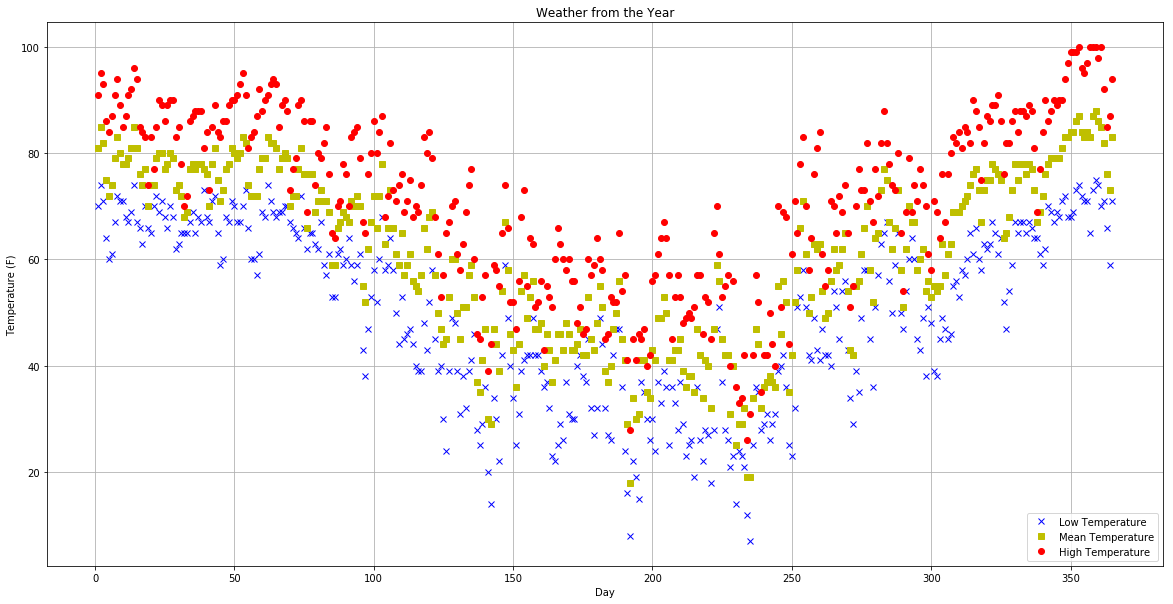

In [5]:
#Creation of time array
timeAr = np.arange(1,366, 1)

plt.figure(0, (20,10))
plt.plot(timeAr, lowTempAr, 'bx', label = 'Low Temperature')
plt.plot(timeAr, meanTempAr, 'ys', label = 'Mean Temperature')
plt.plot(timeAr, highTempAr, 'ro', label = 'High Temperature')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Temperature (F)')
plt.legend(loc = 'lower right')
plt.title('Weather from the Year')
plt.show()

**Question 5**: What observations about the data do you have? For example, when does the data start, summer or winter? Answers these questions and then outline a plan for how you would analyze the data if you wanted to study the average precipitation for specifically the winter months.

<font size="+3">&#9998;</font> There is a dip in temperature near the 125 day mark then it rises back up near the 250 day mark. The data most likely starts during the summer as temperatures are higher during the beginning and end of the data. To analyze precipitation for only winter months, I would first define a temperature threshold when it became winter, probably around 40 degrees F. Once the temperature goes below this value consistently (about 5 days in a row), start recording what days those are. Once the temperature then goes above the threshold consistently (again, about 5 days in a row), stop recording the days. Then, using only those days, perform analysis on the matching days in the average precipitation array. 

# Part 2: Population dynamics

Suppose that a certain population satisfies the initial value problem
\begin{equation}
\dfrac{dy}{dt} = r(t)y-k, \quad   y(0)=y_0
\end{equation}

where the growth rate $r(t)$ is given by $r(t) = (1 + 2\sin t - \cos t)/5$, and $k$ represents the rate of
predation. If at some time $T>0, y(T)=0,$ we say that the population has become extinct.


**Question 6:** **Using `odeint`, solve the above ODE.** Suppose that predation rate $k = 1/5,$  take the initial conditions $y_0$ to be several values between 0.5 and 1 (in increments of 0.1).  

**Make a plot of your results**. Make sure everything is labeled appropriately and that your plot includes a **legend** and a **grid**. You legend you should indicate which line corresponds to which value of $y_0$

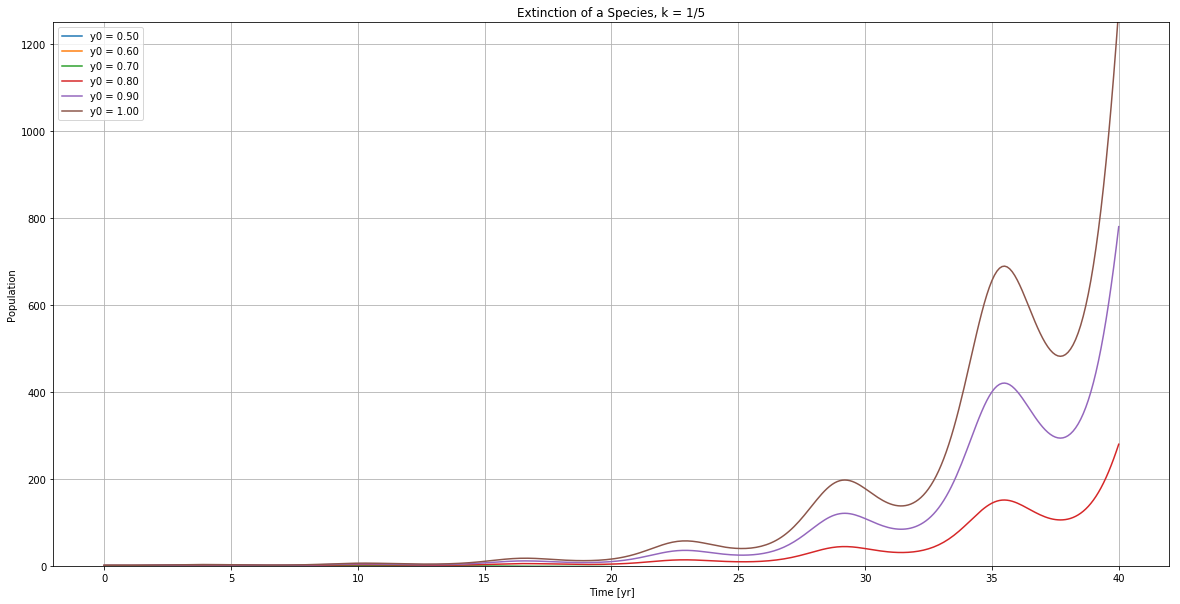

In [6]:
from scipy.integrate import odeint
from math import sin, cos

# Define given values
y0Ar = np.arange(0.5, 1.01, 0.1)
K = 1/5

# Deriv function for ODEINT
def deriv(yCur, t, k):
    dydt = ( ( 1 + (2 * sin(t)) - cos(t) )/5 ) * yCur - k
    return dydt

# Creation of time array
timeAr = np.arange(0, 40.01, 0.1)

#Loop through each initial condition
for i in range(len(y0Ar)):
    #Set initial condition to be the value in the list
    initial = y0Ar[i]
    
    #Solve the ODE
    sol = odeint(deriv, initial, timeAr, args = (K,))
    
    #Tell what figure to plot on
    plt.figure(1, figsize = (20,10))
    
    #Plot with the given initial value
    plt.plot(timeAr, sol[:, 0], label = 'y0 = {:.2f}'.format(y0Ar[i]))

#Format the plot
plt.xlabel('Time [yr]')
plt.ylabel('Population')
plt.title("Extinction of a Species, k = 1/5")
plt.legend(loc = 'upper left')
plt.ylim(0,1250)
plt.grid()
plt.show()

**Question 7:** Using the code from the previous exercise, estimate a critical value of $y_0,$ below which the population is destined to become extinct (keeping 2 digits of accuracy). You should be able to use the results of your first plot to determine approximately where this transition point occurs and then explore that parameter space until you find the critical value. **Use a plot to justify your estimate of the critical value and indicate what this value is in a markdown cell.**

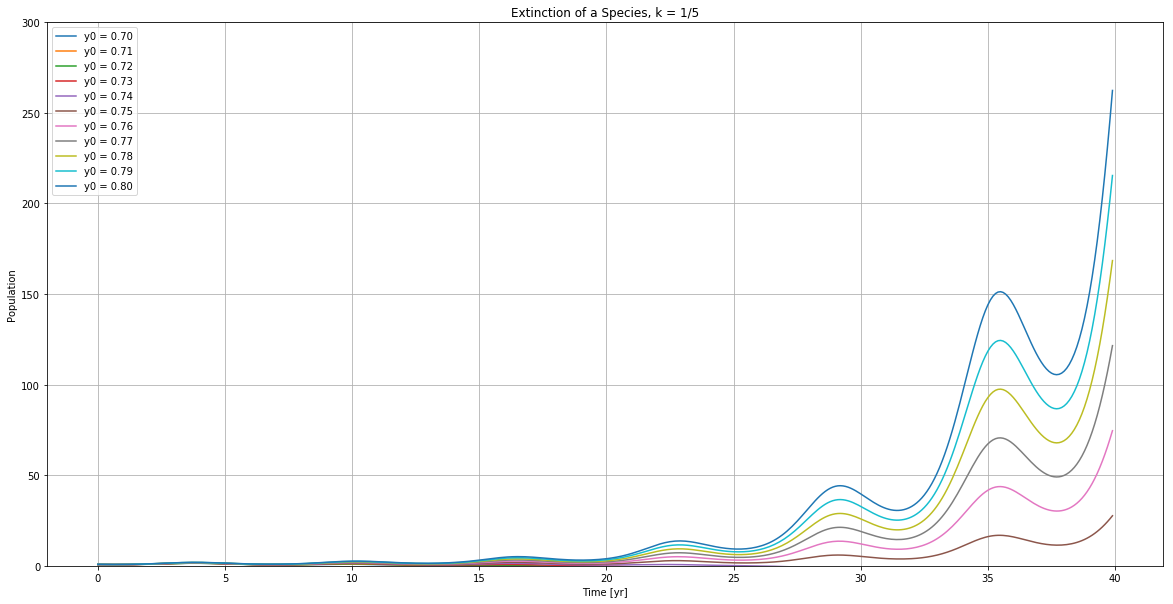

In [7]:
# Put your code here.
0.74 - 0.75
# Define given values
y0Ar = np.arange(0.7, 0.8, 0.01)
K = 1/5

# Deriv function for ODEINT
def deriv(yCur, t, k):
    dydt = ( ( 1 + (2 * sin(t)) - cos(t) )/5 ) * yCur - k
    return dydt

# Creation of time array
timeAr = np.arange(0, 40, 0.1)

#Loop through each initial condition
for i in range(len(y0Ar)):
    #Set initial condition to be the value in the list
    initial = y0Ar[i]
    
    #Solve the ODE
    sol = odeint(deriv, initial, timeAr, args = (K,))
    
    #Tell what figure to plot on
    plt.figure(1, figsize = (20,10))
    
    #Plot with the given initial value
    plt.plot(timeAr, sol[:, 0], label = 'y0 = {:.2f}'.format(y0Ar[i]))

#Format the plot
plt.xlabel('Time [yr]')
plt.ylabel('Population')
plt.title("Extinction of a Species, k = 1/5")
plt.legend(loc = 'upper left')
plt.ylim(0,300)
plt.grid()
plt.show()

According to the plot above, the critical value is about  y0 = 0.75 as that is when we see a change from extinction of the population to no extinction.

**Question 8:** Now let's change the predation rate to $k = 1/3,$ use the same procedure in the previous two questions to find the critical $y_0$ value for this value of $k$ (keeping only 1 digit of accuracy this time). **Use a plot to justify your estimate of the critical value and indicate what this value is in a markdown cell.**

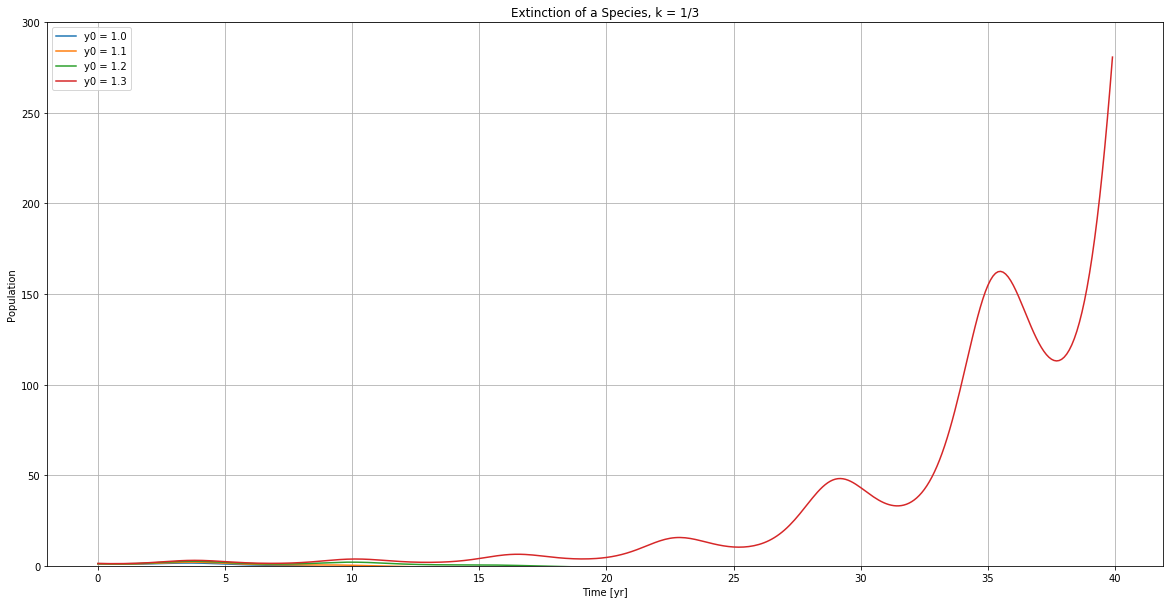

In [8]:

# Define given values
y0Ar = np.arange(1.0,1.3, 0.1)
K = 1/3

# Deriv function for ODEINT
def deriv(yCur, t, k):
    dydt = ( ( 1 + (2 * sin(t)) - cos(t) )/5 ) * yCur - k
    return dydt

# Creation of time array
timeAr = np.arange(0, 40, 0.1)

#Loop through each initial condition
for i in range(len(y0Ar)):
    #Set initial condition to be the value in the list
    initial = y0Ar[i]
    
    #Solve the ODE
    sol = odeint(deriv, initial, timeAr, args = (K,))
    
    #Tell what figure to plot on
    plt.figure(1, figsize = (20,10))
    
    #Plot with the given initial value
    plt.plot(timeAr, sol[:, 0], label = 'y0 = {:.1f}'.format(y0Ar[i]))

#Format the plot
plt.xlabel('Time [yr]')
plt.ylabel('Population')
plt.title("Extinction of a Species, k = 1/3")
plt.legend(loc = 'upper left')
plt.ylim(0,300)
plt.grid()
plt.show()


The critical point is y0 = 1.3 as this is when the population does not drop to zero after some time. Using the original bounds of y0 = 0.5 - 1.0, no critical value exists. 

# Part 3: Forced oscillation and resonance


**Resonance** describes the phenomena of amplification that occurs when the frequency of a periodically applied force is in harmonic proportion to a natural frequency of the system on which it acts. When an oscillating force is applied at the resonant frequency of another system, the system will oscillate at a higher amplitude than when the same force is applied at other, non-resonant frequencies. The collapse of the Broughton bridge
near Manchester, England in 1831 is blamed for the now–standard practise of breaking cadence when soldiers cross a bridge. Bridges like the
Broughton bridge have many natural low frequencies of vibration, so it
is possible for a column of soldiers to vibrate the bridge at one of the
bridge’s natural frequencies. The bridge locks onto the frequency while
the soldiers continue to add to the excursions with every step, causing
larger and larger bridge oscillations.

We consider a harmonic oscillator with force modeled by
\begin{equation}
\dfrac{d^2y}{dt^2} +w_0^2 y=F_0 \cos(w t), \quad   y(0)=0,   y'(0)=0.
\end{equation}

where   $w_0$ is the intrinsic frequency, and $F_0 \cos(w t)$ represents the external force. The equation above can be reformulated by introducing $v=\dfrac{dy}{dt}$, which makes the system:
\begin{equation}
\dfrac{dy}{dt}=v, \\
\dfrac{dv}{dt}=-w_0^2 y+F_0 \cos(w t)
\end{equation}

where $y(0)=0$ and $v(0)=0$ are the initial conditions. Also, for this problem, you can assume that $F_0 = 1$.


**Question 9:** **Using `odeint`, solve the above ODE system.** Suppose that $w_0 = 4,$  take $w= 2, 3, 4, 5, 6.$
Make one plot of $y(t)$ with all parameters. Make sure everything is labeled appropriately and that your plot includes a **legend** and a **grid**.

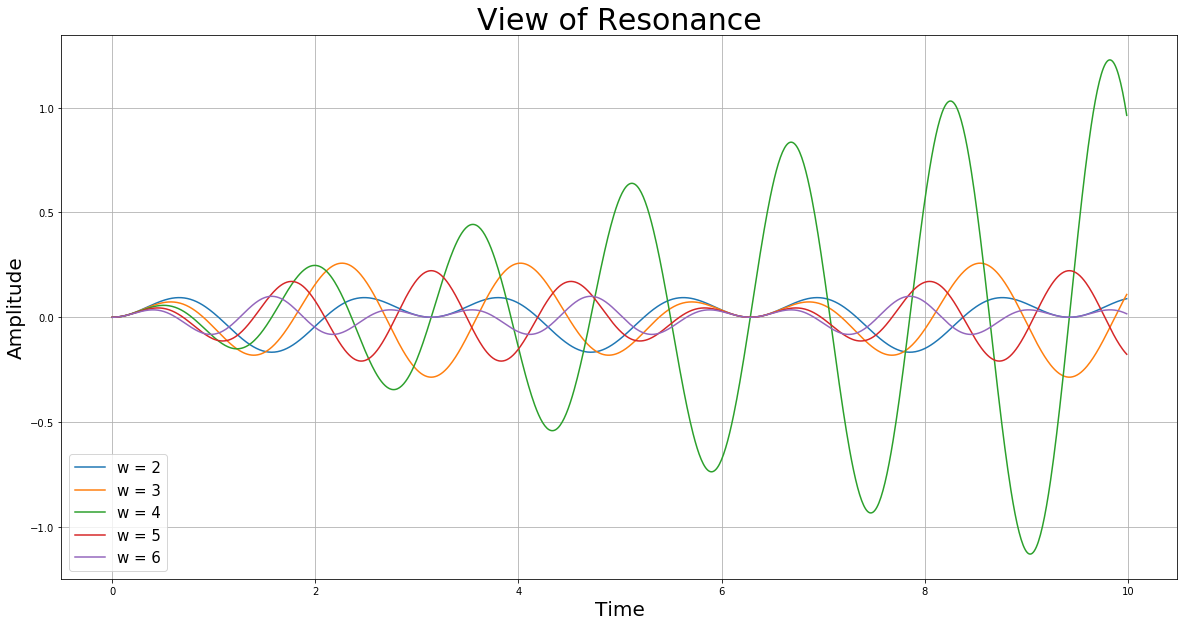

In [9]:
from math import cos
from scipy.integrate import odeint

y0_main = 0
v0_main = 0
w0_main = 4
F0_main = 1
wLis = [2,3,4,5,6]

def resDeriv (currVal, t, w0, F0, w):
    #Unpack current values
    y,v = currVal
    
    #Derivative of y
    dydt = v
    #Derivative of v
    dvdt = (-(w0**2) * y) + (F0 * cos(w * t))
    
    return dydt, dvdt

#Initial values
init = [y0_main, v0_main]

#Creation of time array
timeAr = np.arange(0, 10, 0.01)

for wVal in wLis:
    sol = odeint(resDeriv, init, timeAr, args = (w0_main, F0_main, wVal))
    yLis = sol[:,0]
    plt.figure(1, figsize = (20,10))
    plt.plot(timeAr, yLis, label = 'w = {}'.format(str(wVal)))
    
plt.title('View of Resonance', fontsize = 30)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)
plt.grid()
plt.legend(loc = 'lower left', fontsize = 15)
plt.show()

**Question 10:** Now compare the "phase space" plots ($y$-$v$ plots) of the simulations above for $w_0 = 4,$  and $w= 3, 4, 5.$  Make sure everything is labeled appropriately and that your plot includes a **legend** and a **grid**. Compare the difference. For this question, include each phase space plot **as a separate plot figure**.

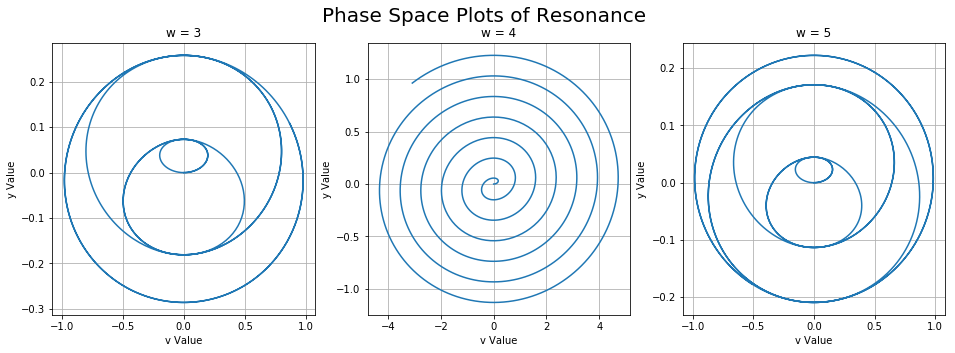

In [10]:
from math import cos
from scipy.integrate import odeint

y0_main = 0
v0_main = 0
w0_main = 4
F0_main = 1
wLis = [3,4,5]

def resDeriv (currVal, t, w0, F0, w):
    #Unpack current values
    y,v = currVal
    
    #Derivative of y
    dydt = v
    #Derivative of v
    dvdt = (-(w0**2) * y) + (F0 * cos(w * t))
    
    return dydt, dvdt

#Initial values
init = [y0_main, v0_main]

#Creation of figure with subplots

fig, ax = plt.subplots(1,3)

#Creation of time array
timeAr = np.arange(0, 10, 0.01)

#Finds solution to ODE of each w value and then plots on specific subplot
for wIndex in range(len(wLis)):
    sol = odeint(resDeriv, init, timeAr, args = (w0_main, F0_main, wLis[wIndex]))
    yLis = sol[:,0]
    vLis = sol[:,1]
    
    ax[wIndex].plot(vLis, yLis)
    ax[wIndex].set_title('w = {}'.format(wLis[wIndex]))
    ax[wIndex].set_xlabel('v Value')
    ax[wIndex].set_ylabel('y Value')
    ax[wIndex].grid()

#Sets a tight layout with a specific width and height
fig.set_figwidth(16)
fig.set_figheight(5)
fig.suptitle('Phase Space Plots of Resonance', fontsize = 20)
fig.show()

**Question 11:** Discuss your results from Questions 9 and 10. Do you observe resonance? How do you reach this conclusion? Justify your answer based on your observations.

Yes, resonance is observed at w = 4. This is shown through the amplification in magnitude of the amplitude when plotting strictly y against time. Also, with the phase space plot of y-v, there is shown an increase in the magnitude in v, leading to an increase in the magnitude of y when v is 0, and vice versa. Both variables work in tandem to amplify the other, leading to the acceptance of resonance at w = 4. 

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [11]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/ei3tdjRqCC1YEbYSA" 
	width="800px" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #3, and upload it there.

### This is just something I wanted to do

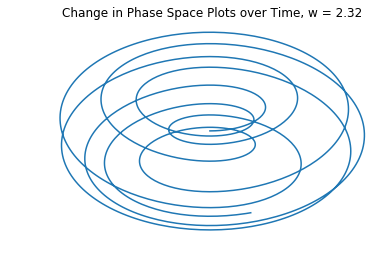

KeyboardInterrupt: 

In [29]:
from math import cos, pi
from scipy.integrate import odeint
import time
import numpy as np 
from IPython.display import display, clear_output

y0_main = 0
v0_main = 0
w0_main = 4
F0_main = 1
wAr = np.arange(2,6.01,0.01)

def resDeriv (currVal, t, w0, F0, w):
    #Unpack current values
    y,v = currVal
    
    #Derivative of y
    dydt = v
    #Derivative of v
    dvdt = (-(w0**2) * y) + (F0 * cos(w * t))
    
    return dydt, dvdt

#Initial values
init = [y0_main, v0_main]

#Creation of time array
timeAr = np.arange(0, 4*pi, 0.01)

#Creation of figure object with subplots
animationFrame, ax = plt.subplots(2,1)
#Finds solution to ODE of each w value and then plots on specific subplot
for wIndex in range(len(wAr)):
    sol = odeint(resDeriv, init, timeAr, args = (w0_main, F0_main, wAr[wIndex]))
    yLis = sol[:,0]
    vLis = sol[:,1]
    plt.figure(1)
    plt.plot(vLis, yLis)
    plt.title('Change in Phase Space Plots over Time, w = {:.2f}'.format(wAr[wIndex]))
    plt.axis('off')
    plt.show()
    
    time.sleep(0.01)  # Stop for a brief moment
    clear_output(wait=True)
    fig.clear()

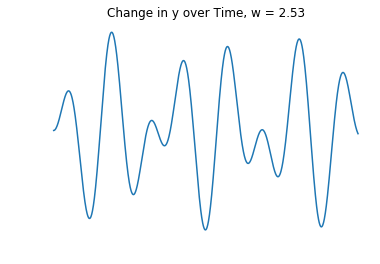

KeyboardInterrupt: 

In [30]:
for wIndex in range(len(wAr)):
    sol = odeint(resDeriv, init, timeAr, args = (w0_main, F0_main, wAr[wIndex]))
    yLis = sol[:,0]
    vLis = sol[:,1]
    plt.figure(1)
    plt.plot(timeAr, yLis)
    plt.title('Change in y over Time, w = {:.2f}'.format(wAr[wIndex]))
    plt.axis('off')
    plt.show()
    
    time.sleep(0.01)  # Stop for a brief moment
    clear_output(wait=True)
    fig.clear()